Carga remota del dataset desde la URL y descompresión del mismo.
Estoy en local de Windows, por lo tanto los comandos son la versión alternativa de cmd, salvo el wget que he decidio descargarme el exe y meterlo en system32.

In [15]:
!wget https://drive.upm.es/s/shvqhjNwmfdS6RS/download -O intel.zip #Descarga el dataset
!tar -xf intel.zip #Descomprime el archivo (x) en una carpeta llamada igual que el zip (f)
!del intel.zip #Borra el zip

--2021-12-15 18:41:48--  https://drive.upm.es/s/shvqhjNwmfdS6RS/download
Resolving drive.upm.es (drive.upm.es)... 138.100.4.11
Connecting to drive.upm.es (drive.upm.es)|138.100.4.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259923470 (248M) [application/zip]
Saving to: 'intel.zip'

     0K .......... .......... .......... .......... ..........  0% 2,04M 2m2s
    50K .......... .......... .......... .......... ..........  0% 4,38M 89s
   100K .......... .......... .......... .......... ..........  0% 12,1M 66s
   150K .......... .......... .......... .......... ..........  0% 4,35M 64s
   200K .......... .......... .......... .......... ..........  0% 3,58M 65s
   250K .......... .......... .......... .......... ..........  0%  998K 96s
   300K .......... .......... .......... .......... ..........  0% 3,77M 92s
   350K .......... .......... .......... .......... ..........  0% 2,46M 93s
   400K .......... .......... .......... .......... ..........  0% 4

126950K .......... .......... .......... .......... .......... 50% 3,10M 39s
127000K .......... .......... .......... .......... .......... 50% 4,36M 39s
127050K .......... .......... .......... .......... .......... 50% 2,63M 39s
127100K .......... .......... .......... .......... .......... 50% 4,37M 39s
127150K .......... .......... .......... .......... .......... 50% 2,56M 39s
127200K .......... .......... .......... .......... .......... 50% 2,48M 39s
127250K .......... .......... .......... .......... .......... 50% 4,36M 39s
127300K .......... .......... .......... .......... .......... 50% 2,61M 39s
127350K .......... .......... .......... .......... .......... 50% 4,17M 39s
127400K .......... .......... .......... .......... .......... 50% 2,57M 39s
127450K .......... .......... .......... .......... .......... 50% 2,58M 39s
127500K .......... .......... .......... .......... .......... 50% 4,15M 39s
127550K .......... .......... .......... .......... .......... 50% 2,49M 39s

251750K .......... .......... .......... .......... .......... 99% 2,42M 1s
251800K .......... .......... .......... .......... .......... 99% 4,75M 1s
251850K .......... .......... .......... .......... .......... 99% 3,75M 1s
251900K .......... .......... .......... .......... .......... 99% 2,39M 1s
251950K .......... .......... .......... .......... .......... 99% 2,56M 1s
252000K .......... .......... .......... .......... .......... 99% 4,45M 1s
252050K .......... .......... .......... .......... .......... 99% 12,0M 1s
252100K .......... .......... .......... .......... .......... 99% 5,51M 1s
252150K .......... .......... .......... .......... .......... 99% 3,31M 1s
252200K .......... .......... .......... .......... .......... 99% 3,66M 0s
252250K .......... .......... .......... .......... .......... 99% 4,68M 0s
252300K .......... .......... .......... .......... .......... 99% 3,83M 0s
252350K .......... .......... .......... .......... .......... 99% 2,52M 0s
252400K ....

Importamos todas las librerias necesarias para la realización de este ejercicio.

In [19]:
!pip3 install opencv-python
import cv2

In [17]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

In [23]:
dir_base = 'intel/'
train_data_dir = 'intel/train'
validation_data_dir = 'intel/validation'

In [54]:
TRAINING_SAMPLES = 2000
TESTING_SAMPLES  = 800

#El tamaño de las imagenes
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

#Inicializamos nuestras variables para dividir el dataset
X_train = []
X_test = []
y_train = []
y_test = []

#Establecemos los distintos tipos de labels que tenemos, así será más fácil poner el y_test
labels = ['buildings','forest','glacier','mountain','sea','street']

#Realizamos el for para obtener las imagenes

#Dividimos las imagenes para testing
for i in range(20000, 20000 + TESTING_SAMPLES // 2):
    for label in labels:        
        name = dir_base+'validation/'+label+'/'+'{}'.format(i)+'.jpg'
        try:#Creamos el try porque no todas las labels tienen todos los números
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_test.append(img2)
            y_test.append(labels.index(label)) #Con respecto a la posicion en array, que es constante y nos ahorramos ifs
        except:
            continue

#Dividimos las imagenes para training       
for i in range(0,TRAINING_SAMPLES // 2):
    for label in labels:
        name = dir_base+'train/'+label+'/'+'{}'.format(i)+'.jpg'
        try:
            image = cv2.imread(name,cv2.IMREAD_COLOR)
            img2 = cv2.resize(image,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X_train.append(img2)        
            y_train.append(labels.index(label))
        except:
            continue  

Después de haber dividido el dataset para train y test, los transformamos en array de numpy y mostramos el shape para comprobar cuantos registros tenemos en cada caso.

In [55]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 150, 150, 3)
(249, 150, 150, 3)
(688,)
(249,)


In [57]:
X_train = X_train / 255.0
X_test = X_test / 255.0

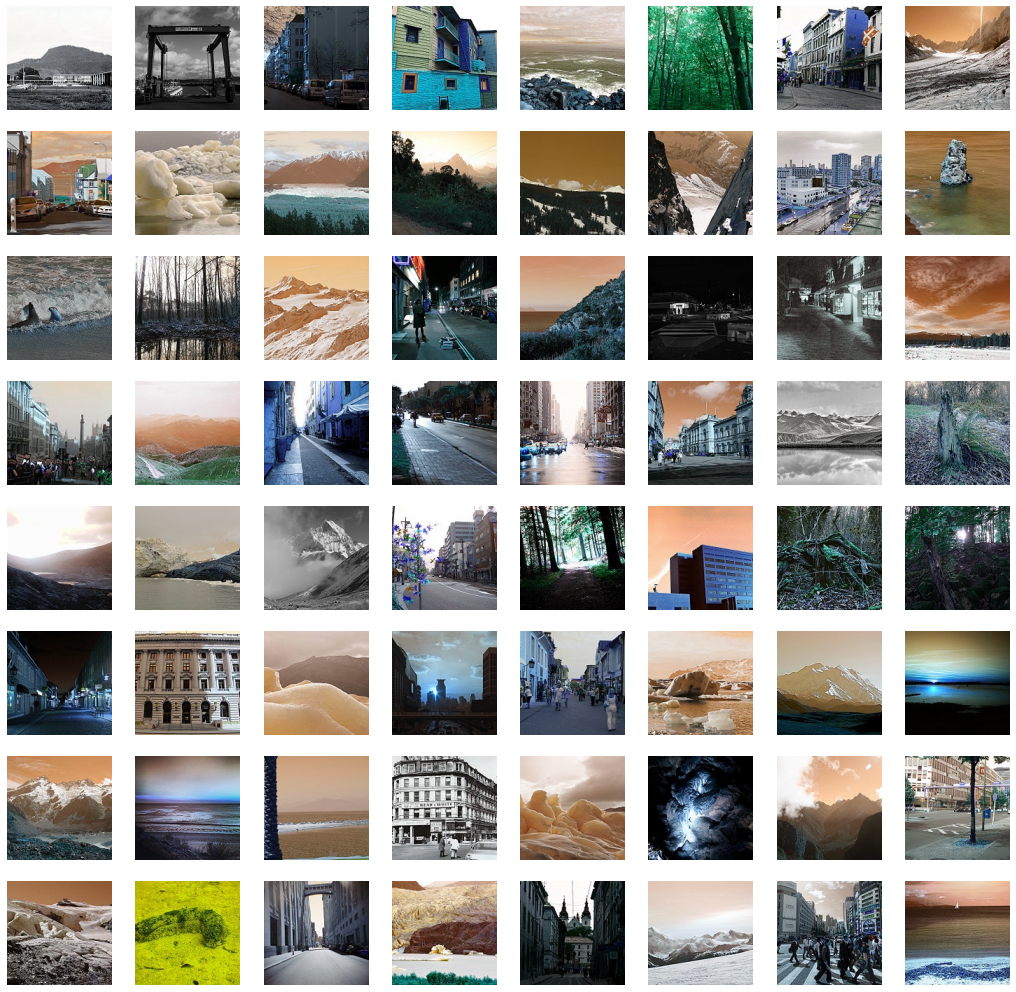

In [58]:
fig, axs = plt.subplots(8,8, figsize=(18,18))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(X_train[i*8+j])
        axs[i,j].axis('off')
plt.show()

In [59]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu',
              input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(48, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [60]:
def plot_train_val(history):
    plt.rcParams['figure.figsize'] = [15, 5]
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
    
    ax1.plot(history.history['loss'], label='loss (train)')
    ax1.plot(history.history['val_loss'], label='loss (val)')
    ax1.set_title('Loss')
    ax1.set_xlabel('epoch')
    ax1.legend(loc="upper right")
    ax2.plot(history.history['accuracy'], label='accuracy (train)')
    ax2.plot(history.history['val_accuracy'], label='accuracy (val)')
    ax2.set_title('Accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(loc="lower right")
    ax1.grid()
    ax2.grid()
    plt.plot()

Epoch 1/20
3/3 [==============================] - 11s 2s/step - loss: -80.4348 - accuracy: 0.1410 - val_loss: -816.6469 - val_accuracy: 0.1446
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: -4515.9521 - accuracy: 0.1701 - val_loss: -14440.8115 - val_accuracy: 0.1446
Epoch 3/20
3/3 [==============================] - 7s 2s/step - loss: -42391.3359 - accuracy: 0.1701 - val_loss: -77286.7031 - val_accuracy: 0.1446
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: -172030.1562 - accuracy: 0.1701 - val_loss: -233336.0781 - val_accuracy: 0.1446
Epoch 5/20
3/3 [==============================] - 7s 2s/step - loss: -464738.6875 - accuracy: 0.1701 - val_loss: -534329.6250 - val_accuracy: 0.1446
Epoch 6/20
3/3 [==============================] - 7s 2s/step - loss: -995421.1875 - accuracy: 0.1701 - val_loss: -1030487.0625 - val_accuracy: 0.1446
Epoch 7/20
3/3 [==============================] - 7s 2s/step - loss: -1846825.6250 - accuracy: 0.1701 - val_loss: -1

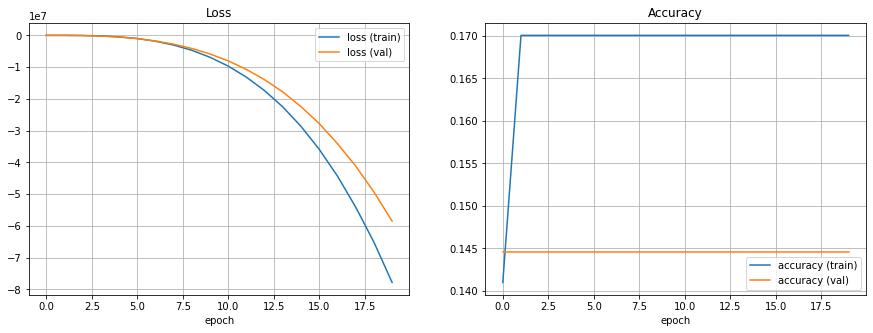

In [61]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    model_cnn = create_model()
    model_cnn.compile(
        loss='binary_crossentropy', 
        optimizer='rmsprop', metrics=['accuracy'])
    history = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=20, batch_size=256, verbose=1)
plot_train_val(history)